In [ ]:
import qiskit
import numpy as np

In [ ]:
qiskit.__version__

Nuestro circuito debe de consistir de n+1 qubits, un qubit será el responsable de ser la moneda mientras que los otos n corresponderan al espacio de la caminata, un ciclo de 2^n vértices.

In [ ]:
from qiskit import QuantumCircuit

n=6 #largo de nuestra caminata
circuito=QuantumCircuit(n+1) #nuestro circuito cuántico
circuito.draw(output="mpl")

In [ ]:
#Dado que el ciclo es invariante bajo rotaciones entonces siempre podemos inicializar en el vértice v=0
circuito.barrier()
for i in range(n):
    circuito.h(i) #cuando el estado inicial es v=0 entonces la transformada de fourier son solo compuertas de hadamard
circuito.draw(output="mpl")

In [ ]:
circuito.barrier()
for i in range(n):
    circuito.p((2*np.pi)/2**i,i).inverse()
circuito.draw("mpl")

In [ ]:
circuito.barrier()
for i in range(1, n):
    angle = (2 * np.pi) / (2 ** i)

    # Build 1-qubit rotation gate on qubit 0 (dummy circuit)
    temp_qc = QuantumCircuit(1)
    temp_qc.p(angle, 0)
    R = temp_qc.to_gate()

    # Controlled version of that gate
    cR = R.control(1)

    # Apply: control = qubit n, target = i
    circuito.append(cR, [n, i])

circuito.draw('mpl')

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

# Apply QFT
circuito.append(QFT(n).inverse(), range(n))

circuito.draw('mpl')

Hagamos nuestra caminata en forma, definimos el largo de nuestro ciclo y agregamos la transformada cuántica de fourier inicial

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

n=2 #largo de nuestra caminata
caminata=QuantumCircuit(n+1,n) #nuestro circuito cuántico

caminata.append(QFT(n,do_swaps=False),range(n)) #QFT

#for i in range(n):
    #caminata.h(i)

caminata.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

Ahora creamos la compuerta de "evolución"

In [8]:
qc=QuantumCircuit(n+1,name="U") 

#Las compuertas R_i^\dagger
for i in range(n):
    qc.p((2*np.pi)/2**i,i).inverse()
#Nuestra compuerta de la moneda
qc.h(n)
#Las compuertas cR_i
for i in range(1, n):
    temp = QuantumCircuit(1)
    temp.p((2 * np.pi) / (2 ** i), 0)
    R = temp.to_gate()

    cR = R.control(1)

    qc.append(cR, [n, i])

U=qc.to_gate()

Implementemoslo en nuestra caminata junto la transformada inversa de fourier

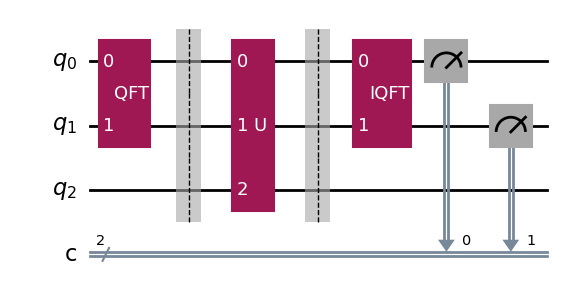

In [9]:
#Hay que implementar U el número de pasos que queramos hacer
t=1
for i in range(t):
    caminata.append(U, list(range(n + 1)))

caminata.barrier()
caminata.append(QFT(n,do_swaps=False).inverse(),range(n))
caminata.measure(range(n), range(n))
caminata.draw("mpl")

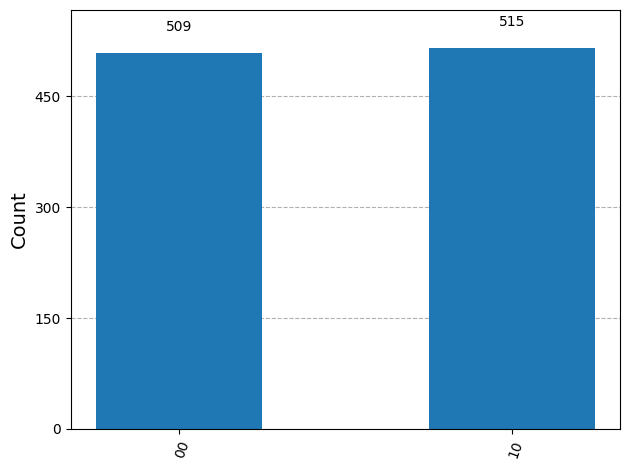

In [5]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
qc_compiled = transpile(caminata, backend)
job = backend.run(qc_compiled, shots=1024)
counts = job.result().get_counts()

# Mostrar resultados
plot_histogram(counts)

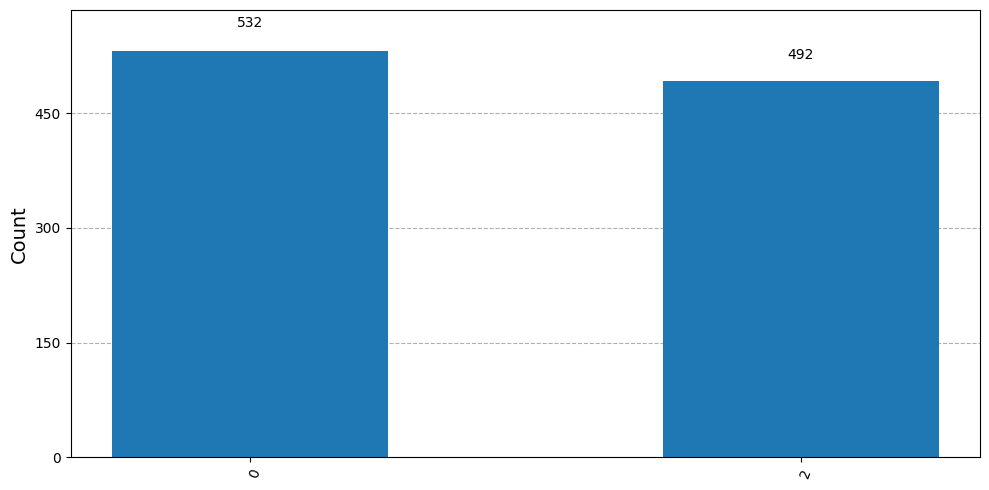

In [6]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Choose backend
backend = Aer.get_backend('qasm_simulator')

# Compile and run
qc_compiled = transpile(caminata, backend)
job = backend.run(qc_compiled, shots=1024)
counts = job.result().get_counts()

decimal_counts = {int(k, 2): v for k, v in counts.items()}


plot_histogram(dict(sorted(decimal_counts.items())), figsize=(10, 5))
